# Iterations vs. Gain

## Large

In [ ]:
from numpy import random 
import pandas as pd
from pdb import set_trace
from datetime import datetime
import numpy as np
import sys

with open('wc_top_50_confs.txt', 'r') as _f:
    wc_scaleup = list(map(int, _f.read().splitlines()))

with open('wc_scale_up_small_to_large.txt', 'r') as f:
    large_scaleup = list(map(int, f.read().splitlines()))

baseline = large_scaleup[0]

measure_gain = lambda x: int((baseline - x) * 100 / baseline)
perf_after_iterations = [(0, measure_gain(baseline))]
max_perf = -10e32

for i in range(250):
    if i in wc_scaleup:
        idx = wc_scaleup.index(i)
        perf = large_scaleup[idx]
        max_perf =  max(max_perf, measure_gain(perf))
        perf_after_iterations.append((i, max_perf))
    else:
        perf_after_iterations.append((i, perf_after_iterations[-1][-1]))

perf_after_iterations = pd.DataFrame(perf_after_iterations)
perf_after_iterations.columns = ['Iterations', 'Peak Performance']


## Plotting

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib
import matplotlib.ticker as ticker


# --- Configure seaborn ---
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
sns.set_style({'font.family': 'Noto Sans'})
sns.set_style("ticks")
sns.set_context("poster", font_scale=1, rc={"lines.linewidth": 2.5})
colors = ["pale red", "windows blue", "dark grey", "faded green", "amber", "dusty purple"]
sns.set_palette(sns.xkcd_palette(colors))
# --- Begin Plotting ---
ax = sns.lineplot(x="Iterations", y="Peak Performance", data=perf_after_iterations)
# ax.lines[0].set_linestyle("-.")
# ax.legend_.remove()
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xlim(0, 260)
ax.set_ylim(0, 50)
ax.set_ylabel("Gain (%)")
ax.xaxis.set_major_locator(ticker.MultipleLocator(65))
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
sns.despine(offset=10, trim=True)
ax.set_title("Large")
# --- Save and Display Figure and clear ---
plt.savefig("large.pdf", dpi=400, bbox_inches='tight', pad_inches=0)
plt.show()
plt.clf()


## Huge

In [ ]:
from numpy import random 
import pandas as pd
from pdb import set_trace
from datetime import datetime
import numpy as np
import sys

with open('wc_top_50_confs.txt', 'r') as _f:
    wc_scaleup = list(map(int, _f.read().splitlines()))

with open('wc_scale_up_small_to_huge.txt', 'r') as f:
    huge_scaleup = list(map(int, f.read().splitlines()))

baseline = huge_scaleup[0]

measure_gain = lambda x: int((baseline - x) * 100 / baseline)
perf_after_iterations = [(0, measure_gain(baseline))]
max_perf = -10e32

for i in range(250):
    if i in wc_scaleup:
        idx = wc_scaleup.index(i)
        perf = huge_scaleup[idx]
        max_perf =  max(max_perf, measure_gain(perf))
        perf_after_iterations.append((i, max_perf))
    else:
        perf_after_iterations.append((i, perf_after_iterations[-1][-1]))

perf_after_iterations = pd.DataFrame(perf_after_iterations)
perf_after_iterations.columns = ['Iterations', 'Peak Performance']

## Plotting

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib
import matplotlib.ticker as ticker


# --- Configure seaborn ---
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
sns.set_style({'font.family': 'Noto Sans'})
sns.set_style("ticks")
sns.set_context("poster", font_scale=1, rc={"lines.linewidth": 2.5})
colors = ["windows blue", "dark grey", "pale red", "faded green", "amber", "dusty purple"]
sns.set_palette(sns.xkcd_palette(colors))
# --- Begin Plotting ---
ax = sns.lineplot(x="Iterations", y="Peak Performance", data=perf_after_iterations)
# ax.lines[0].set_linestyle("-.")
# ax.legend_.remove()
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xlim(0, 260)
ax.set_ylim(0, 50)
ax.set_ylabel("Gain (%)")
ax.xaxis.set_major_locator(ticker.MultipleLocator(65))
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
sns.despine(offset=10, trim=True)
ax.set_title("Huge")
# --- Save and Display Figure and clear ---
plt.savefig("Huge.pdf", dpi=400, bbox_inches='tight', pad_inches=0)
plt.show()
plt.clf()


# Break-even Charts

## Large

### 1.  Data Formatting

In [5]:
from numpy import random 
import pandas as pd
from pdb import set_trace
from datetime import datetime
import numpy as np

small = pd.read_csv('hadoop_small_results.csv')
small.columns = ['iter', 'date', 'time', 'conf', 'perf']
small['runtime'] = small.perf.apply(lambda x: int(x))

with open('wc_scale_up_small_to_large.txt', 'r') as f:
    large_scaleup = list(map(int, f.read().splitlines()))

baseline = 1000 * [0]
base = large_scaleup[0]

chart_data = []
top__1 = int(len(small) / 4.5) * [-base]
# top__1 = np.cumsum(top__1).tolist()
numel_top__1 = len(top__1)
top_50 = (int(len(small) / 4.5) + 50 )* [-base] # + [base-large_scaleup[i] for i in range(1, len(large_scaleup))]
# top_50 = np.cumsum(top_50).tolist()
numel_top_50 = len(top_50)

for j in range(len(baseline) - numel_top_50):
        top_50.append(top_50[-1] + base - min(large_scaleup))
        top__1.append(top__1[-1] + base - large_scaleup[1])
        
for one, fifty, default in zip(top__1, top_50, baseline):
    chart_data.append([one, fifty, default])

chart_data = pd.DataFrame(chart_data)
chart_data.columns = ['Top-1', 'Top-50', 'Baseline']
chart_data /= 3600

chart_data.to_csv('trade_off_large.csv', index_label='Run')

# --- Stack dataframe to plot --- #
chart_data = chart_data.stack().reset_index()
chart_data.columns = ['Runs', 'Type', 'Runtime']
    

### 2.  Plotting

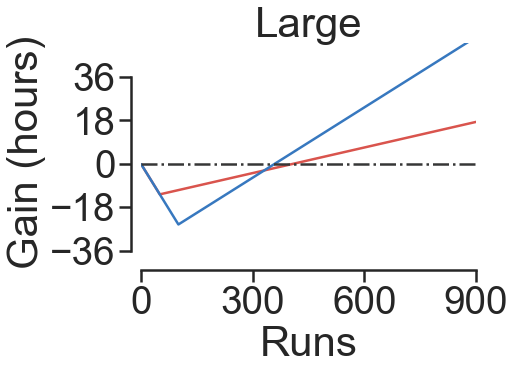

<Figure size 432x288 with 0 Axes>

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib
import matplotlib.ticker as ticker


# --- Configure seaborn ---
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
sns.set_style({'font.family': 'Noto Sans'})
sns.set_style("ticks")
sns.set_context("poster", font_scale=1.75, rc={"lines.linewidth": 2.5})
colors = ["pale red", "windows blue", "dark grey", "faded green", "amber", "dusty purple"]
sns.set_palette(sns.xkcd_palette(colors))
# --- Begin Plotting ---
ax = sns.lineplot(x="Runs", y="Runtime", hue="Type", data=chart_data)
ax.lines[2].set_linestyle("-.")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.legend_.remove()

ax.set_xlim(0, 900)
ax.set_ylim(-40, 50)
ax.set_ylabel("Gain (hours)")
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.yaxis.set_major_locator(ticker.MultipleLocator(18))
sns.despine(offset=10, trim=True)
ax.set_title("Large")
# --- Save and Display Figure and clear ---
plt.savefig("large.pdf", dpi=400, bbox_inches='tight', pad_inches=0)
plt.show()
plt.clf()


## Huge

### 1.  Data Formatting

In [3]:
from numpy import random 
import pandas as pd
from pdb import set_trace
from datetime import datetime
import numpy as np

small = pd.read_csv('hadoop_small_results.csv')
small.columns = ['iter', 'date', 'time', 'conf', 'perf']
small['runtime'] = small.perf.apply(lambda x: int(x))

with open('wc_scale_up_small_to_huge.txt', 'r') as f:
    huge_scaleup = list(map(int, f.read().splitlines()))

baseline = 1000 * [0]
base = huge_scaleup[0]

chart_data = []
top__1 = int(len(small) / 40) * [-base]
top__1 = np.cumsum(top__1).tolist()
numel_top__1 = len(top__1)
top_50 = (int(len(small) / 40) + 50 )* [-base] # + [base-huge_scaleup[i] for i in range(1, len(huge_scaleup))]
top_50 = np.cumsum(top_50).tolist()
numel_top_50 = len(top_50)

for j in range(len(baseline) - numel_top_50):
        top_50.append(top_50[-1] + base - min(huge_scaleup))
        top__1.append(top__1[-1] + base - huge_scaleup[1])
        
for one, fifty, default in zip(top__1, top_50, baseline):
    chart_data.append([one, fifty, default])

chart_data = pd.DataFrame(chart_data)
chart_data.columns = ['Top-1', 'Top-50', 'Baseline']
chart_data /= 3600

chart_data.to_csv('trade_off_huge.csv', index_label='Run')

# --- Stack dataframe to plot --- #
chart_data = chart_data.stack().reset_index()
chart_data.columns = ['Runs', 'Type', 'Runtime']
    

### 2.  Plotting

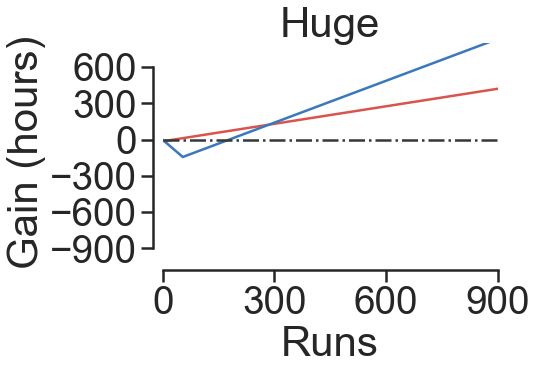

<Figure size 432x288 with 0 Axes>

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib
import matplotlib.ticker as ticker

# --- Configure seaborn ---
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
sns.set_style({'font.family': 'Noto Sans'})
sns.set_style("ticks")
sns.set_context("poster", font_scale=1.75, rc={"lines.linewidth": 2.5})
colors = ["pale red", "windows blue", "dark grey", "faded green", "amber", "dusty purple"]
sns.set_palette(sns.xkcd_palette(colors))
# --- Begin Plotting ---
ax = sns.lineplot(x="Runs", y="Runtime", hue="Type", data=chart_data)
ax.lines[2].set_linestyle("-.")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.legend_.remove()
ax.set_xlim(0, 900)
ax.set_ylim(-1000, 800)
ax.set_ylabel("Gain (hours)")
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.yaxis.set_major_locator(ticker.MultipleLocator(300))
sns.despine(offset=10, trim=True)
ax.set_title("Huge")
# --- Save and Display Figure and clear ---
plt.savefig("Huge.pdf", dpi=400, bbox_inches='tight', pad_inches=0)
plt.show()
plt.clf()